In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn
import pickle

print("pandas version:",pd.__version__)
print("numpy version:", np.__version__)
print("sklearn version:", sklearn.__version__)
print("pickle version:", pickle.format_version)
print("We are here >> ",os.getcwd())

pandas version: 1.3.5
numpy version: 1.18.1
sklearn version: 0.22.1
pickle version: 4.0
We are here >>  /Users/ticnow/Desktop/model_to_production


* https://satishgunjal.com/binary_lr_sklearn/

In [4]:
print(os.listdir(os.getcwd()))

['study_data.ipynb', 'data.csv', '.ipynb_checkpoints', 'train_and_test2.csv']


In [5]:
df = pd.read_csv("data.csv")
df.head()

,Exam 1 marks,Exam 2 marks,Admission status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
df.columns.values

array(['Exam 1 marks', 'Exam 2 marks', 'Admission status'], dtype=object)

In [9]:
 df. rename(columns = {'Exam 1 marks':'mark1', 'Exam 2 marks':'mark2', "Admission status": "admission"}, inplace = True)
    

In [10]:
df.columns.values

array(['mark1', 'mark2', 'admission'], dtype=object)

In [11]:
df.head()

,mark1,mark2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
df.dtypes

mark1        float64
mark2        float64
admission      int64
dtype: object

In [18]:
df.describe()

,mark1,mark2,admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


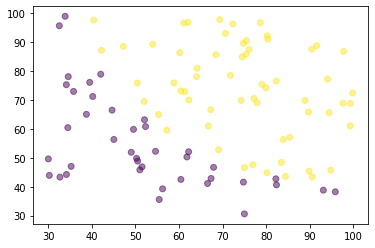

In [17]:
plt.scatter(df.loc[:,"mark1"].values, 
            df.loc[:,"mark2"].values,
            c= df.loc[:,"admission"].values,
            alpha=0.5)
plt.show()

In [22]:
X = df.loc[:,["mark1", "mark2"]]
y = df.loc[:, "admission"]

# Sample dataset
## train / test (RANDOM)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42)

# Training model

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [27]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
X.head(2)

,mark1,mark2
0,34.623660,78.024693
1,30.286711,43.894998


In [35]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: admission, Length: 100, dtype: int64

In [32]:
X.values[:2,:]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752]])

In [36]:
clf.predict(X.values[:2, :])

array([0, 0])

In [37]:
clf.predict_proba(X.values[:2, :])

array([[9.77300746e-01, 2.26992539e-02],
       [9.99993107e-01, 6.89279967e-06]])

In [39]:
clf.predict_proba([[34.62365962, 78.02469282]])

array([[0.97730075, 0.02269925]])

In [45]:
# Save model >> pickle (bin)
filename = 'logit_marks_admissions.sav'
pickle.dump(clf, open(filename, 'wb'))